In [1]:
# -*- coding: utf-8 -*-
"""
Workshop : Text preparation step by step

Author: Muni Ranjan
Contributor: Team Text Miners
"""
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import string

import nltk
import numpy as np

from nltk import FreqDist, word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from bs4 import BeautifulSoup
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

stopwords = stopwords.words('english')
stopwords.extend(["victim", "suddenly", "crane", "worker", "incident", "work", "three", "died","hospital", "place", "time",
                 "involving", "occured", "occurred", "fell", "another", "prior", "caused", "height", "working", "found",
                 "came", "trying", "due", "happened","back","performing","carrying","using","poor","two","colleague","lost","meter",
                 "metre","structure","platform","assigned", "believe", "approximately", "employee", "employees", "hospitalize",
                 "onto", "metre", "national", "october", "june", "company", "left", "right", "every", "instead", "short", "first",
                 "name", "chance", "start", "sale", "open", "within", "number", "morning", "afternoon", "likely", "adjustable", "adjuster",
                 "atthe", "newly", "second", "youngest", "parent", "single", "july", "whole"])
wnl = nltk.WordNetLemmatizer()
snowball = nltk.SnowballStemmer('english')
lancaster = nltk.LancasterStemmer()
porter = nltk.PorterStemmer()

ModuleNotFoundError: No module named 'wordcloud'

In [33]:
''' Document containing the summary data from Malaysia accident data'''
import pandas as pd
import os

train_accident_cases=pd.read_excel(os.path.join(os.path.dirname('__file__'), 'Data', 'Train_MsiaAccidentCases.xlsx'))
test_accident_cases=pd.read_excel(os.path.join(os.path.dirname('__file__'), 'Data', 'Test_MsiaAccidentCases.xlsx'))
accidentCases_Osha=pd.read_excel(os.path.join(os.path.dirname('__file__'), 'Data', 'osha.xlsx'))

X_Cases_Trn = train_accident_cases.Title_Summary_Case
X_Cases_Tst = test_accident_cases.Title_Summary_Case
Y_Cases_Trn = train_accident_cases.Cause
Y_Cases_Tst = test_accident_cases.Cause
X_Cases_Osha_Predict = accidentCases_Osha.Title_Summary_Case

In [34]:
class util:
    def __init__(self):
        pass
        
    def tag_text_ignore_func_words(self, text):
        listofRequiredTokens = []
        tagged_text =  pos_tag(word_tokenize(text))
        for tag_tuple in tagged_text:
            if(str(tag_tuple[1]).startswith("NN") or 
               str(tag_tuple[1]).startswith("VB") or
               str(tag_tuple[1]).startswith("JJ") or
               str(tag_tuple[1]).startswith("RB")):
                listofRequiredTokens.append(str(tag_tuple[0]))
        return listofRequiredTokens
                
    def my_tokenizer(self, text):
        #tokens = nltk.tokenize.word_tokenize(str(text)) # split string into words (tokens)
        tokens = self.tag_text_ignore_func_words(text)
        tokens = [t for t in tokens if t not in string.punctuation] # remove punctuations
        tokens = [t.lower() for t in tokens if len(t) > 2] # remove short words and downcase rest
        tokens = [t for t in tokens if t not in stopwords] # remove stopwords
        tokens = [wnl.lemmatize(t, 'v') for t in tokens] # put words into base form using Lemmatization

        #tokens = [snowball.stem(t) for t in tokens] # put words into base form using Snowbal Stemmer
        #tokens = [lancaster.stem(t) for t in tokens] # put words into base form using Lancaster Stemmer
        #tokens = [porter.stem(t) for t in tokens if t.endswith('ing')] # put words into base form using most popular stemmer
        return(tokens)
    
    def my_tokens_as_text(self, text):
        text_clean =  " ".join(self.my_tokenizer(text))
        text_clean = text_clean.replace("fell", "fall")
        text_clean = text_clean.replace("coworker", "")
        text_clean = text_clean.replace("believe", "")
        text_clean = text_clean.replace("hospitalize", "")
        
        return text_clean
    
    def generateWordCloudByCategory(self, train_accident_cases_df):
        groups = list()
        listofWc = []
        for g, data in train_accident_cases_df.groupby(by='Cause'):
            #print(g, ":", data)
            groups.append(data)
        #print(groups)
        #Let's extract the summary column under each group and concatenate to generate the word cloud
        for df in groups:
            tempText = df['Summary_Case'].str.cat(sep=';')
            print(df['Cause'].unique());
            tempTokens = self.my_tokenizer(tempText);
            text_clean = " ".join(tempTokens)
            wc = WordCloud(collocations=False ,background_color="white").generate(text_clean)
            listofWc.append(wc)
        return listofWc
    
    def unique_list(self, l):
        ulist = []
        [ulist.append(x) for x in l if x not in ulist]
        return ulist

    def generateWordCloudDataFrame(self, data_frame):
        listofWc = []
        text_clean =  data_frame.str.cat(sep=' ')
        #text_clean=' '.join(self.unique_list(text_clean.split()))
        wc = WordCloud(collocations=False, background_color="white").generate(text_clean)
        listofWc.append(wc)
        return listofWc
        #print(text)
        
    def showWordCloud(self, listofWc):
        for wc in listofWc:
            plt.imshow(wc, interpolation='bilinear')
            plt.axis("off")
            plt.show()
            
    def tag_noun_func_words(self, text):
        listofRequirednouns = []
        tagged_text =  pos_tag(word_tokenize(text))
        for tag_tuple in tagged_text:
            if(str(tag_tuple[1]).startswith("NN") or 
               str(tag_tuple[1]).startswith("NNS")):
                listofRequirednouns.append(str(tag_tuple[0]))
        return listofRequirednouns

In [35]:
#Test Code
myObj = util()
listofwords = myObj.my_tokenizer("Died being caught in between machines. The accident occurred as victim was assigned to inspect and maintain excavator magnet machine. As maintenance work is carried out, the victim made a jump start on grappler to turn on excavator engine. Suddenly the grappler spinning and pinned the victim between the grappler and excavator")
print(listofwords)
text = myObj.my_tokens_as_text("Died being caught in between machines. The accident occurred as victim was assigned to inspect and maintain excavator magnet machine. As maintenance work is carried out, the victim made a jump start on grappler to turn on excavator engine. Suddenly the grappler spinning and pinned the victim between the grappler and excavator")
#Y_Cases_Trn.describe()
X_Cases_Trn.describe()
X_Toks_Trn = X_Cases_Trn.apply(myObj.my_tokens_as_text)
X_Toks_Tst = X_Cases_Tst.apply(myObj.my_tokens_as_text)

['catch', 'machine', 'accident', 'inspect', 'maintain', 'excavator', 'magnet', 'machine', 'maintenance', 'carry', 'make', 'jump', 'grappler', 'turn', 'excavator', 'engine', 'grappler', 'spin', 'pin', 'grappler', 'excavator']


In [36]:
#myObj.showWordCloud(myObj.generateWordCloudDataFrame(X_Toks_Trn))

In [37]:
#X_Toks_Osha = X_Cases_Osha_Predict.apply(myObj.my_tokens_as_text)

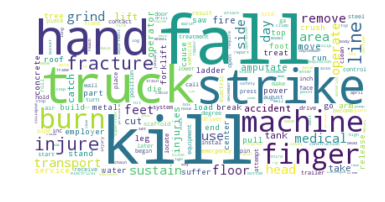

In [38]:
#myObj.showWordCloud(myObj.generateWordCloudDataFrame(X_Toks_Osha))

In [20]:
#X_Toks_Osha.str.findall("coer")

0                          [coer]
1                              []
2                              []
3                              []
4                    [coer, coer]
5                              []
6                              []
7                              []
8                          [coer]
9                              []
10                         [coer]
11                             []
12                             []
13                             []
14                             []
15                             []
16                             []
17                             []
18       [coer, coer, coer, coer]
19                   [coer, coer]
20                             []
21                         [coer]
22                             []
23                             []
24                             []
25                             []
26                             []
27                   [coer, coer]
28                             []
29            

['Caught in/between Objects']
['Collapse of object']
['Drowning']
['Electrocution']
['Exposure to Chemical Substances']
['Exposure to extreme temperatures']
['Falls']
['Fires and Explosion']
['Other']
['Struck By Moving Objects']
['Suffocation']


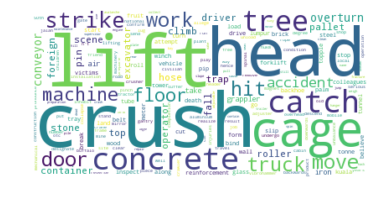

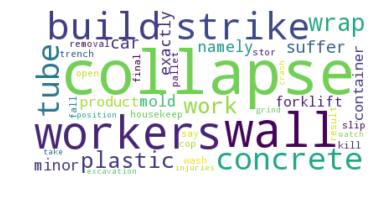

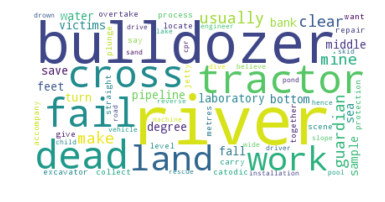

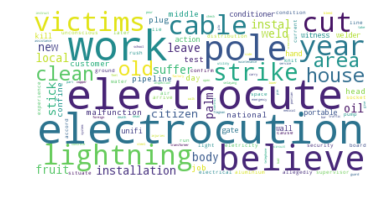

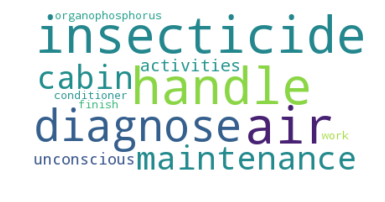

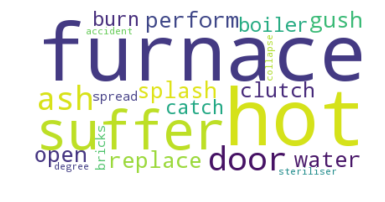

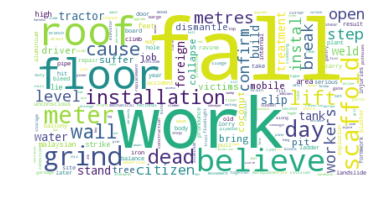

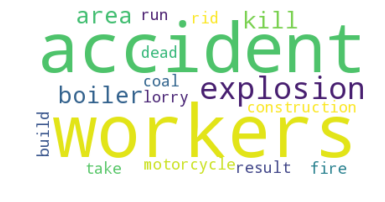

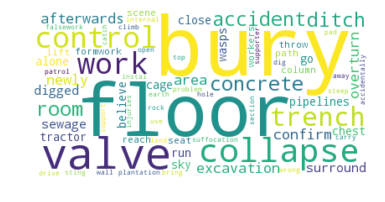

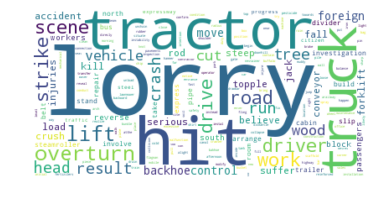

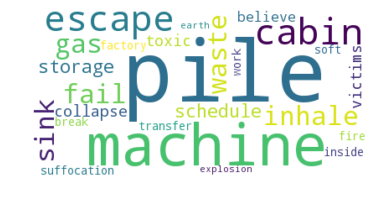

In [257]:
#wc = myObj.generateWordCloudByCategory(train_accident_cases)
#myObj.showWordCloud(wc)

In [258]:
'''top_N = 10
txt = X_Toks_Trn.str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')
rslt.plot.bar(rot=0)
plt.show()'''

All frequencies, including STOPWORDS:
      Word  Frequency
0     fall         89
1   strike         39
2    crush         35
3      hit         34
4    lorry         27
5  tractor         27
6     lift         27
7    floor         22
8    catch         21
9    truck         19


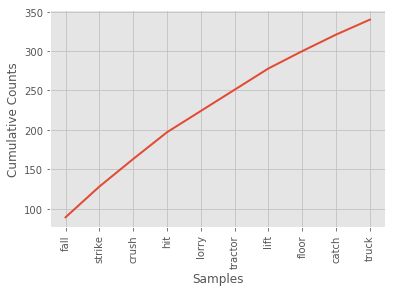

In [260]:
#word_dist.plot(10, cumulative=True)

In [261]:
#FreqDist and #Cumulative Count for Osha Data
'''top_N = 10
txt = X_Toks_Osha.str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')
rslt.plot.bar(rot=0)'''

All frequencies, including STOPWORDS:
      Word  Frequency
0     fall       6358
1     kill       6016
2    truck       5642
3   strike       5397
4  machine       5280
5     hand       5200
6     coer       5135
7    leave       4973
8   finger       4605
9     burn       4515


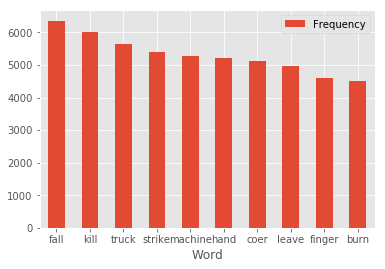

In [262]:
#plt.show()

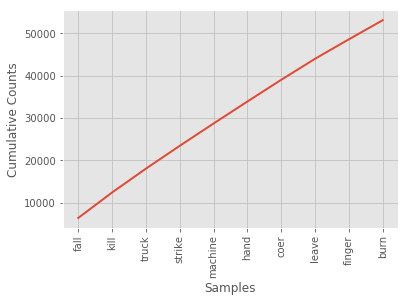

In [263]:
#word_dist.plot(10, cumulative=True)